# ***EDA***

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('/content/sample_data/Cardiotocographic.csv')

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS  

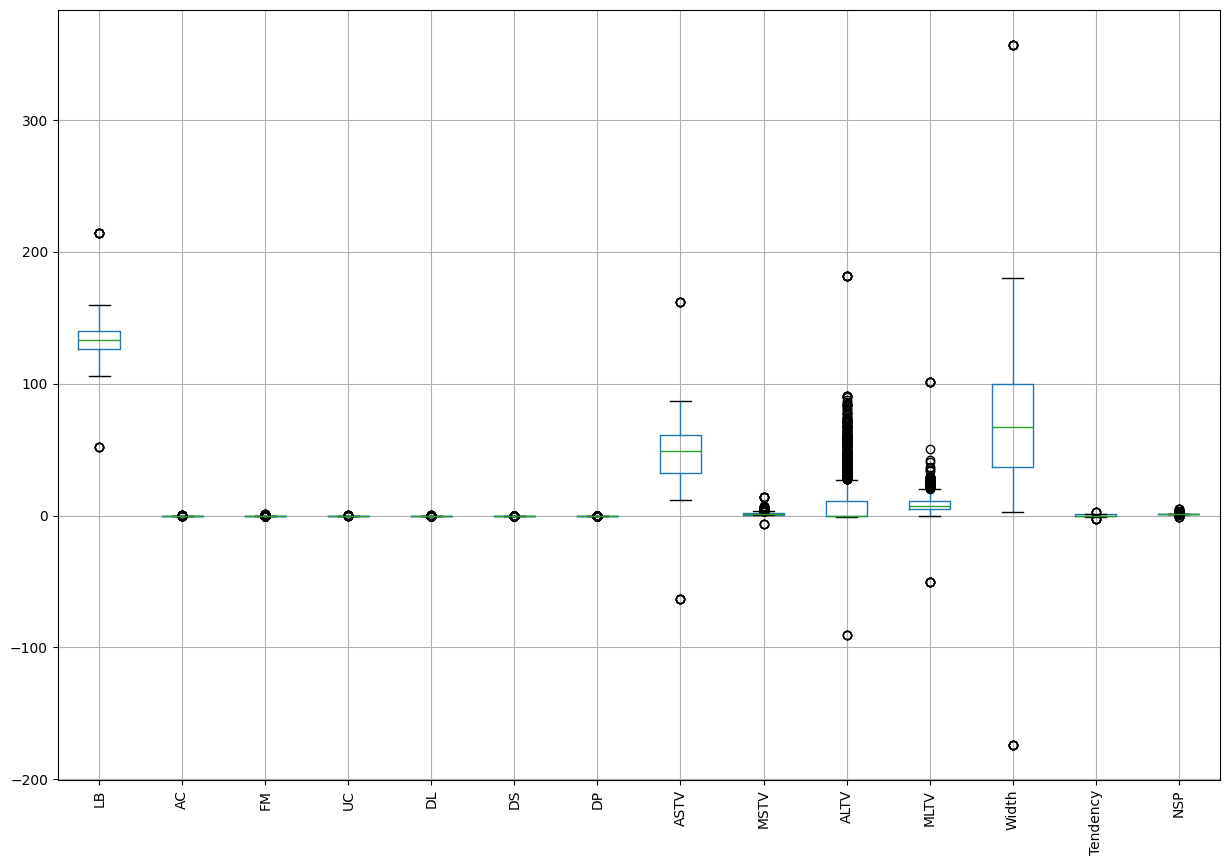

In [3]:
# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Display data types of each column
print(data.dtypes)

# Handle missing values (if any)
# Here we assume there are no missing values based on the check

# Check for outliers using boxplots
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [4]:
# Statistical summary of the dataset
summary = data.describe()
print(summary)

# Highlight interesting findings from the summary
# For example, we might look at the range of values for LB (Baseline Fetal Heart Rate)
print(f"Range of LB: {summary.loc['min', 'LB']} - {summary.loc['max', 'LB']}")

                LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

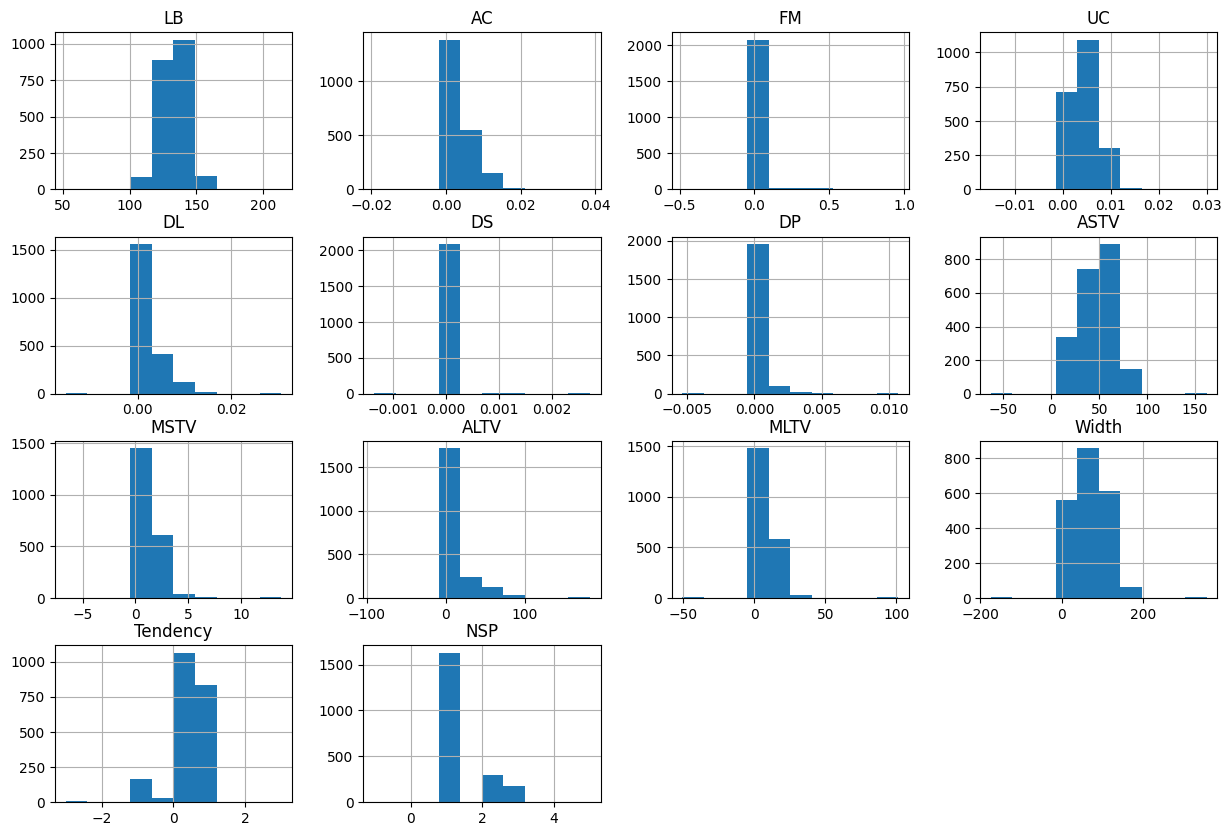

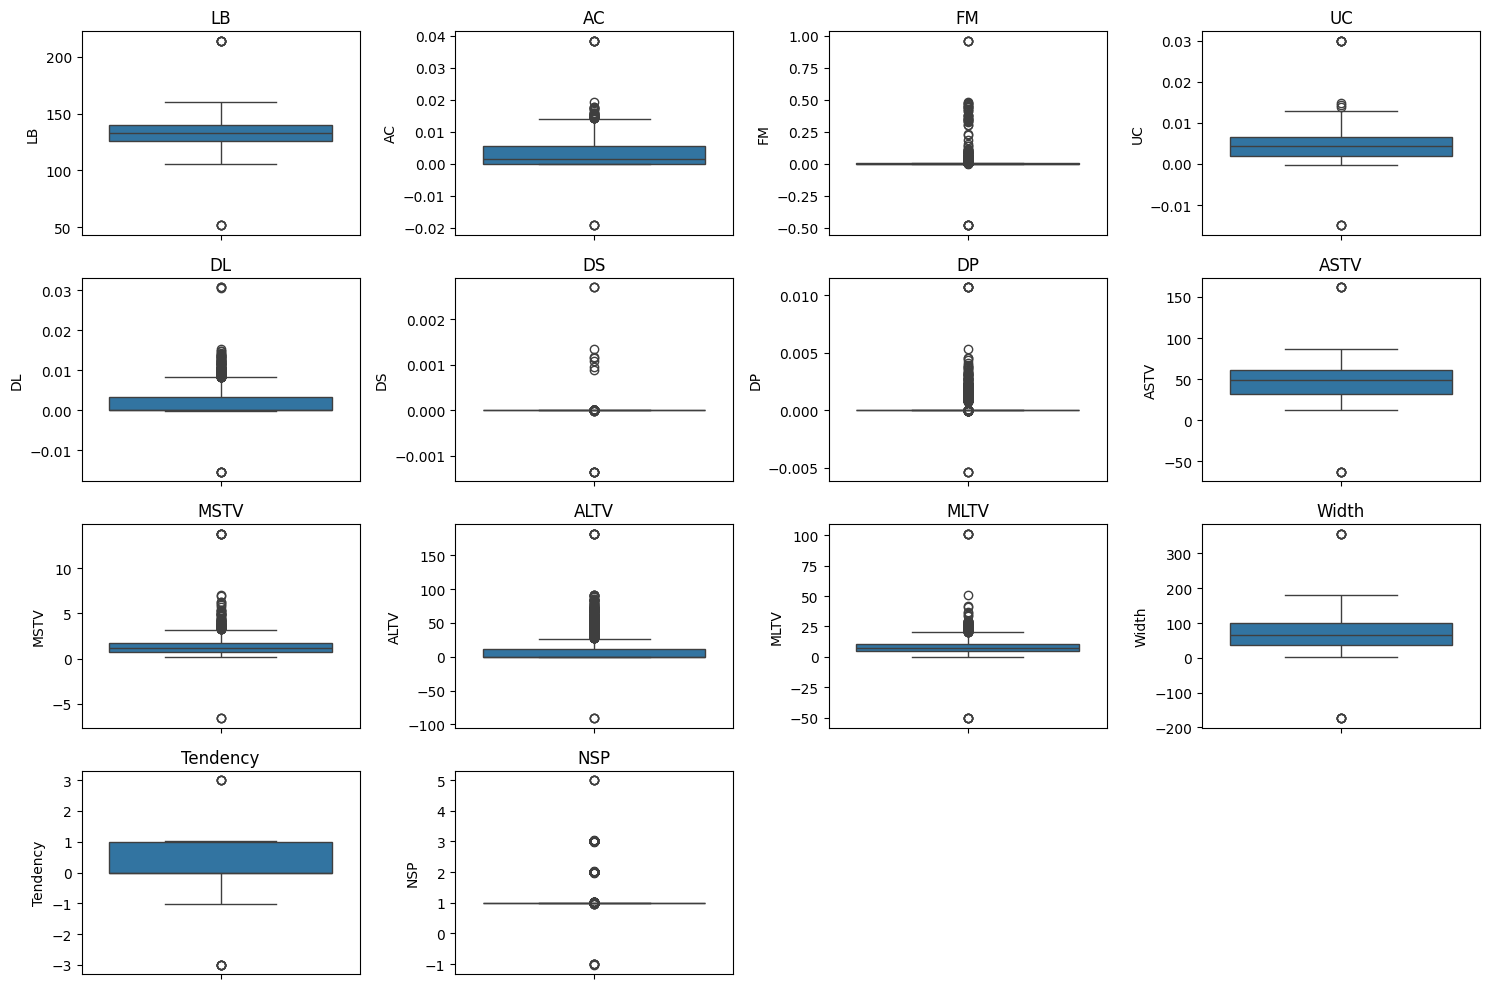

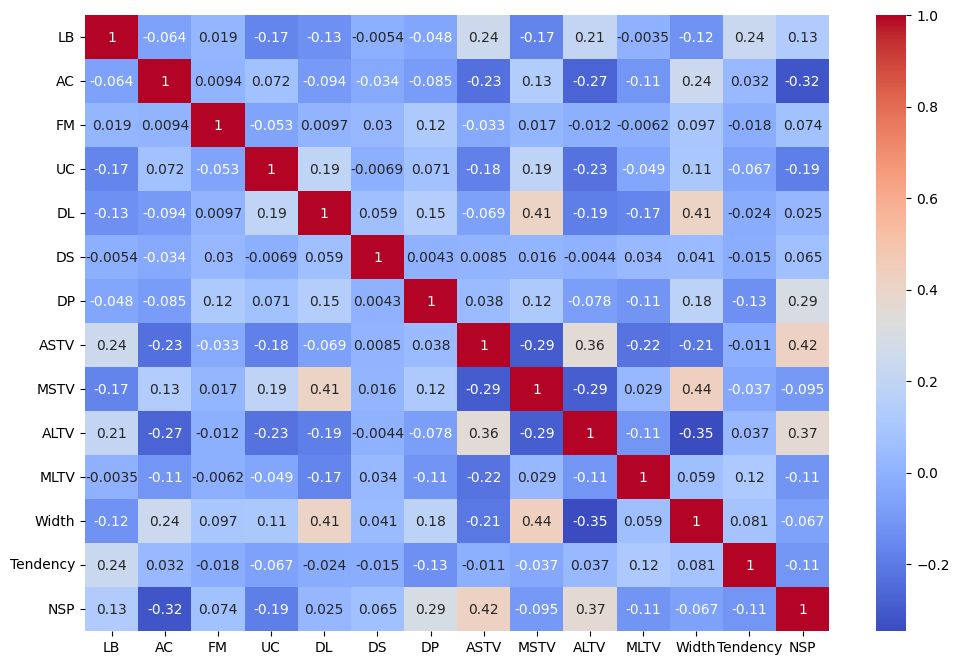

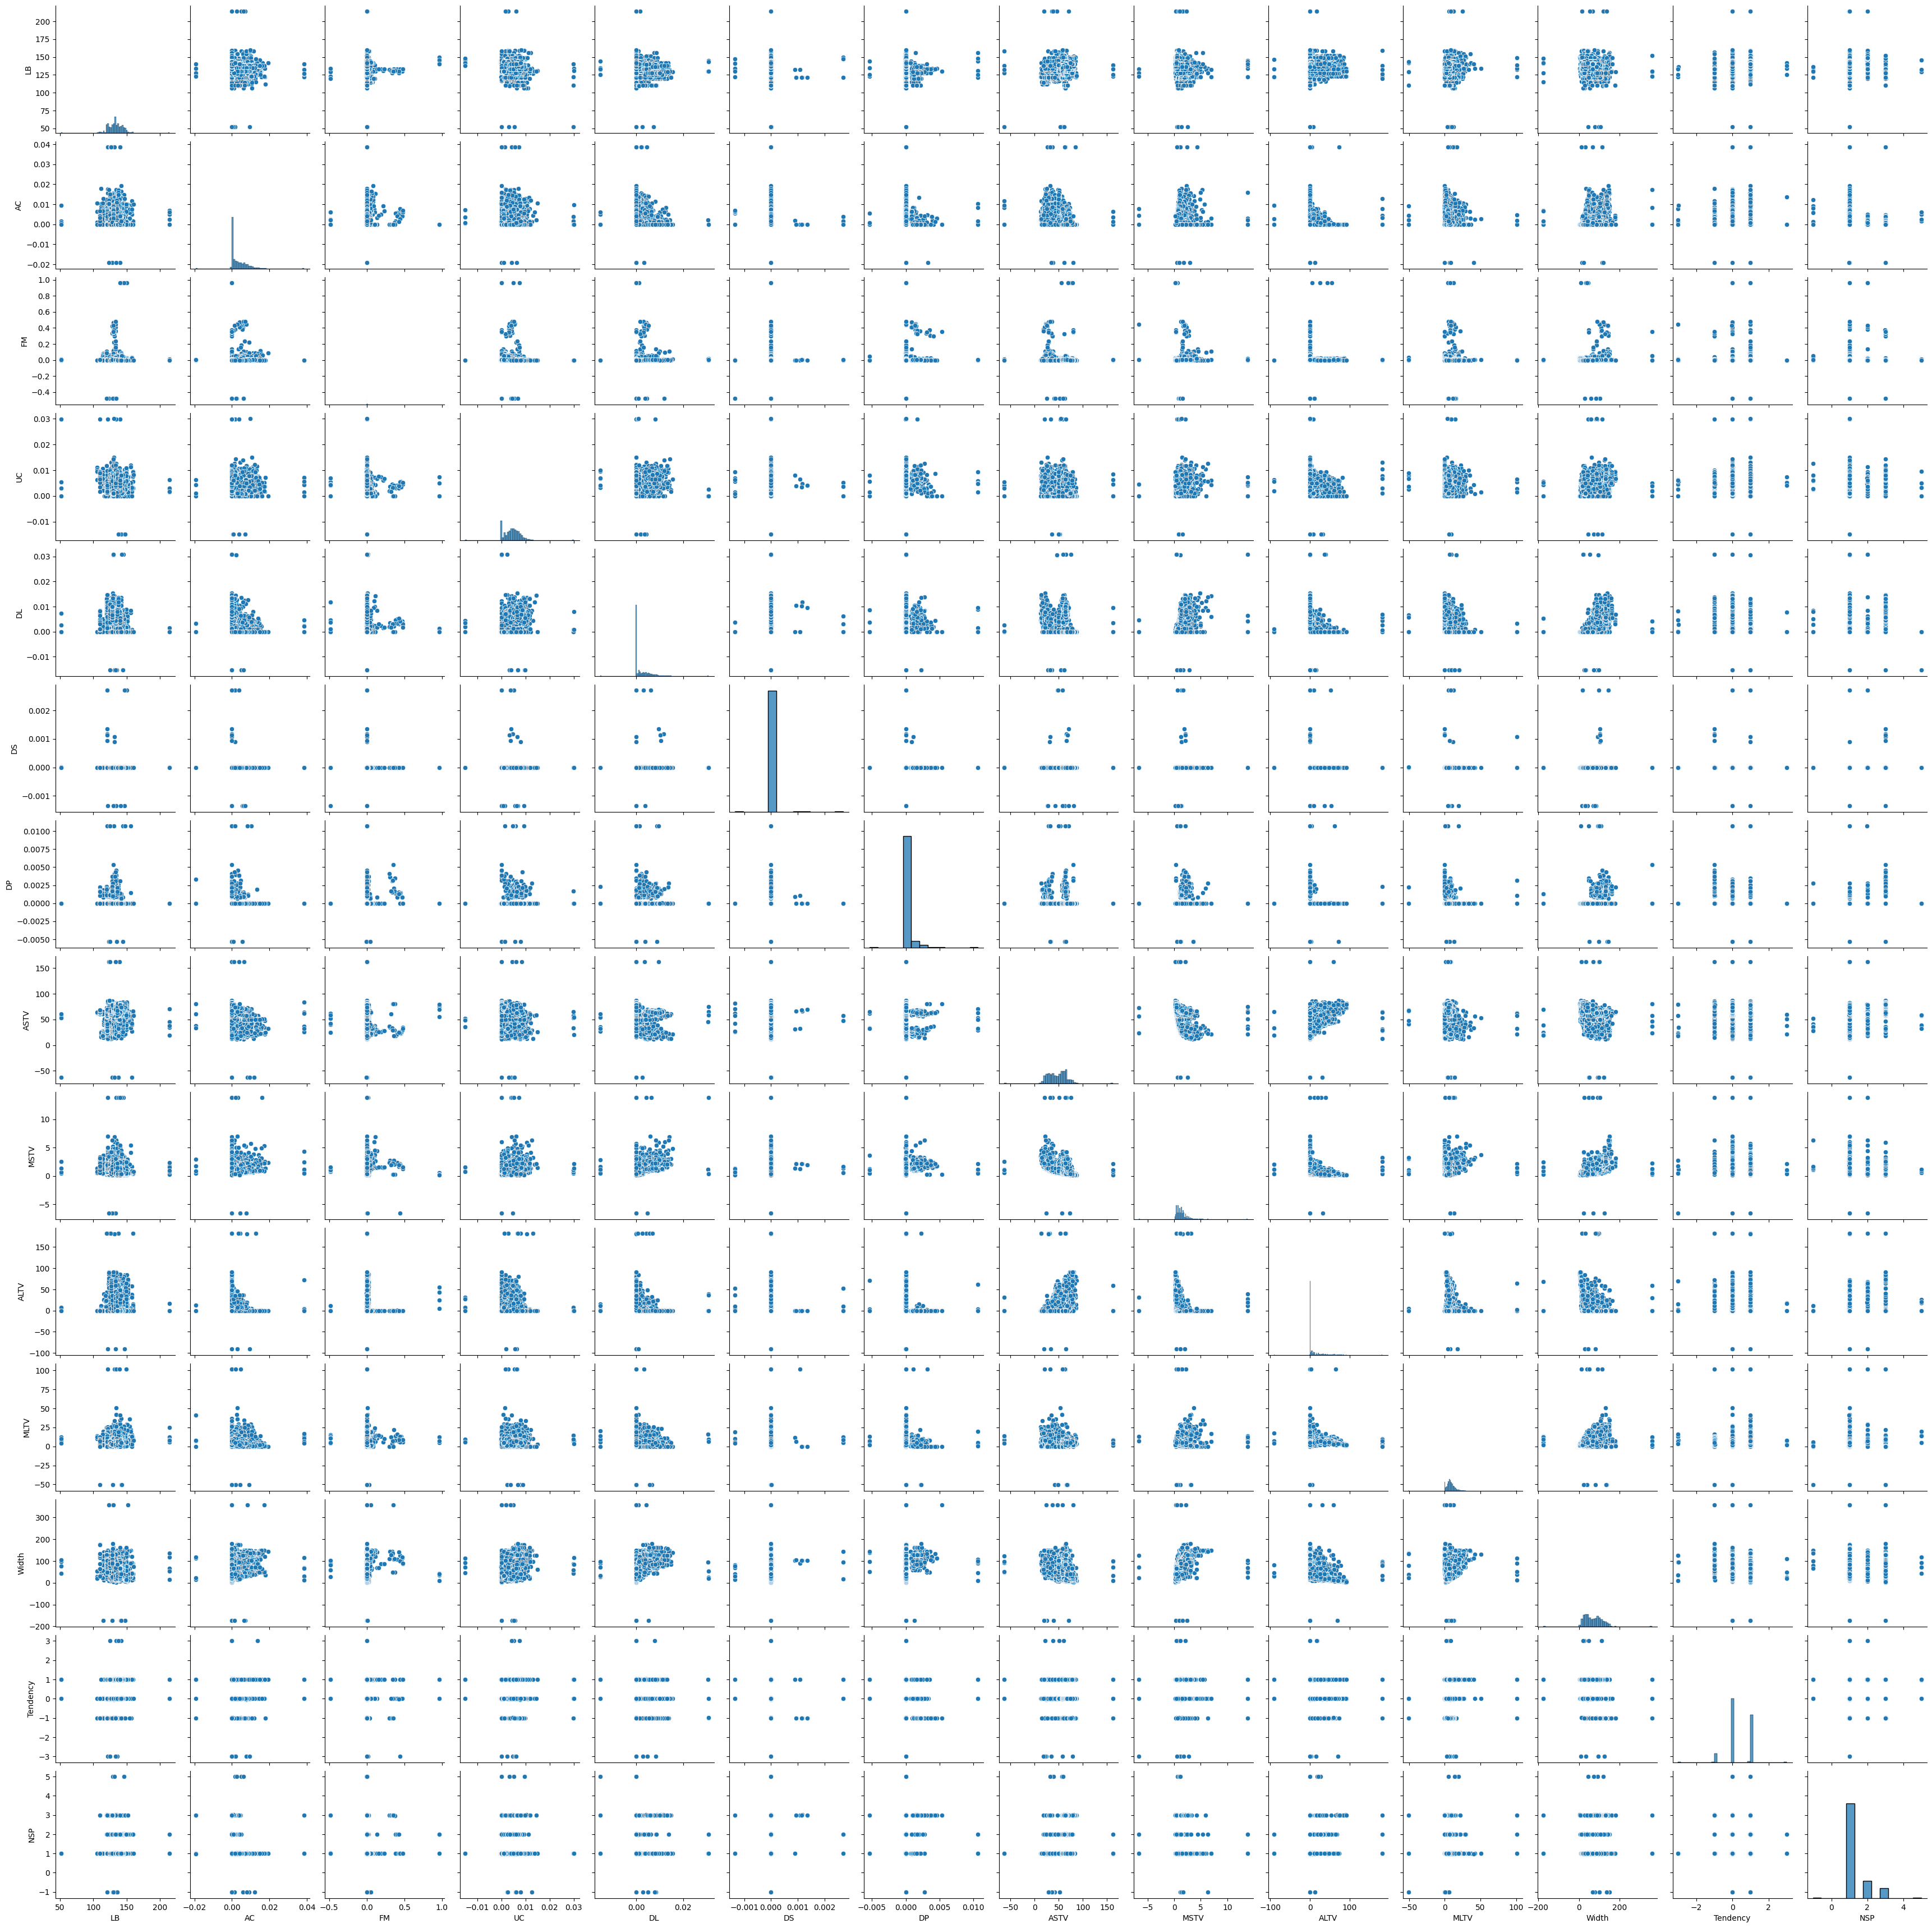

In [5]:
# Histograms for numerical variables
data.hist(figsize=(15, 10))
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Scatter plot matrix (pair plot)
sns.pairplot(data)
plt.show()

In [6]:
# Identify correlations
correlation_matrix = data.corr()
print(correlation_matrix)

# Highlight some strong correlations
strong_corr = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix != 1.0)].dropna(how='all').dropna(axis=1, how='all')
print("Strong correlations:\n", strong_corr)

# Discuss potential implications of these correlations
# Example: Correlation between LB (Baseline Fetal Heart Rate) and ASTV (Abnormal Short Term Variability)


                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.072012 -0.093507 -0.033623   
FM        0.018777  0.009433  1.000000 -0.053226  0.009718  0.029901   
UC       -0.166570  0.072012 -0.053226  1.000000  0.190128 -0.006937   
DL       -0.126959 -0.093507  0.009718  0.190128  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.231103 -0.032691 -0.181161 -0.069361  0.008452   
MSTV     -0.170473  0.134168  0.017055  0.189406  0.410102  0.016163   
ALTV      0.210728 -0.271390 -0.011936 -0.227304 -0.186967 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.01

In [7]:
# Conclusion summary
conclusion = """
Key Insights:
1. The dataset contains variables related to fetal heart rate and uterine contractions.
2. The mean Baseline Fetal Heart Rate (LB) is approximately X (based on summary statistics).
3. There are strong correlations between LB and ASTV, indicating a potential relationship between baseline heart rate and abnormal short-term variability.
4. Visualizations such as boxplots and histograms help in understanding the distribution and identifying outliers in the data.

Implications:
1. These findings could be used to monitor fetal well-being and predict potential distress.
2. Further analysis could focus on predictive modeling using these variables to identify high-risk pregnancies.

Recommendations:
1. Perform further analysis using machine learning techniques to build predictive models.
2. Collect more data if possible to validate these findings and improve model accuracy.

"""

print(conclusion)


Key Insights:
1. The dataset contains variables related to fetal heart rate and uterine contractions.
2. The mean Baseline Fetal Heart Rate (LB) is approximately X (based on summary statistics).
3. There are strong correlations between LB and ASTV, indicating a potential relationship between baseline heart rate and abnormal short-term variability.
4. Visualizations such as boxplots and histograms help in understanding the distribution and identifying outliers in the data.

Implications:
1. These findings could be used to monitor fetal well-being and predict potential distress.
2. Further analysis could focus on predictive modeling using these variables to identify high-risk pregnancies.

Recommendations:
1. Perform further analysis using machine learning techniques to build predictive models.
2. Collect more data if possible to validate these findings and improve model accuracy.


